# Predicting sin value with Keras


In [2]:
%pylab inline
import numpy as np
from queue import deque

from tools import create_sin, make_timeseries, split_train_test, visualize_random_data

from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import r2_score, mean_squared_error

from IPython.display import SVG, Image
from keras.utils.vis_utils import model_to_dot

Populating the interactive namespace from numpy and matplotlib


# Data

In [2]:
X_SIZE = 256
Y_SIZE = 256

data = create_sin()
data_x, data_y = make_timeseries(data, x_size=X_SIZE, y_size=Y_SIZE)
train_x, test_x = split_train_test(data_x)
train_y, test_y = split_train_test(data_y)

print('train_x:', train_x.shape)
print('train_y:', train_y.shape)
print('test_x :', test_x.shape)
print('test_y :', test_y.shape)

train_x: (15592, 256, 1)
train_y: (15592, 256, 1)
test_x : (3897, 256, 1)
test_y : (3897, 256, 1)


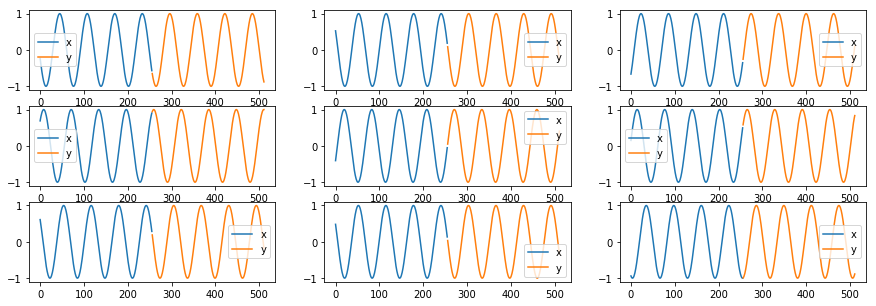

In [3]:
visualize_random_data(train_x, train_y)

# Model

Synced Recurrent Network 를 사용합니다.<br>
따라서 처음 예측의 output이 틀릴 확률이 있습니다.<br>
해당부분은 Bidirection 을 사용하면 해결되지만 여기서는 가장 단순한 모델을 사용하고자 합니다.

In [4]:
np.random.seed(0)
LATENT_DIM = 32

model = Sequential()
model.add(SimpleRNN(LATENT_DIM, input_shape=(X_SIZE, 1), return_sequences=True))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])t

# Train

In [5]:
model.fit(train_x, train_y, batch_size=2048, verbose=2, epochs=30)

Epoch 1/30
1s - loss: 0.9605 - mean_squared_error: 0.9605
Epoch 2/30
0s - loss: 0.2568 - mean_squared_error: 0.2568
Epoch 3/30
0s - loss: 0.0663 - mean_squared_error: 0.0663
Epoch 4/30
0s - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 5/30
0s - loss: 0.0344 - mean_squared_error: 0.0344
Epoch 6/30
0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 7/30
0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 8/30
0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 9/30
0s - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 10/30
0s - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 11/30
0s - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 12/30
0s - loss: 0.0164 - mean_squared_error: 0.0164
Epoch 13/30
0s - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 14/30
0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 15/30
0s - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 16/30
0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 17/30
0s - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 

R^2 : 0.97971574446
MSE : 0.0101424398031


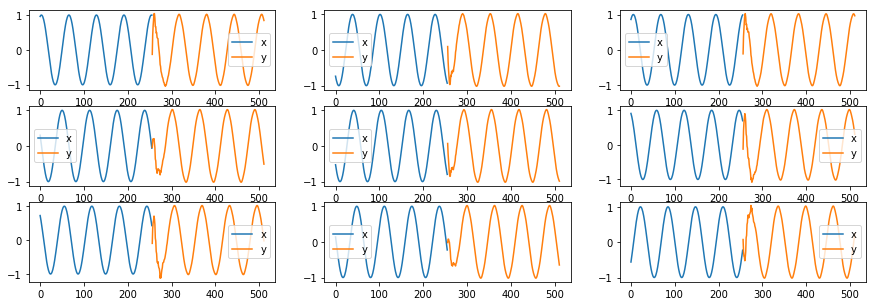

In [6]:
def evaluate(test_x, test_y, pred_y):
    test_y = test_y.reshape(-1, Y_SIZE)
    pred_y = pred_y.reshape(-1, Y_SIZE)

    score = r2_score(test_y, pred_y)
    print('R^2 :', score)
    print('MSE :', mean_squared_error(test_y, pred_y))

pred_y = model.predict(test_x)
evaluate(test_x, test_y, pred_y)
visualize_random_data(test_x, pred_y)